<img src=attachment:627433c9-e2b3-488b-ab85-ce5049aeb8d2.png width=1000>
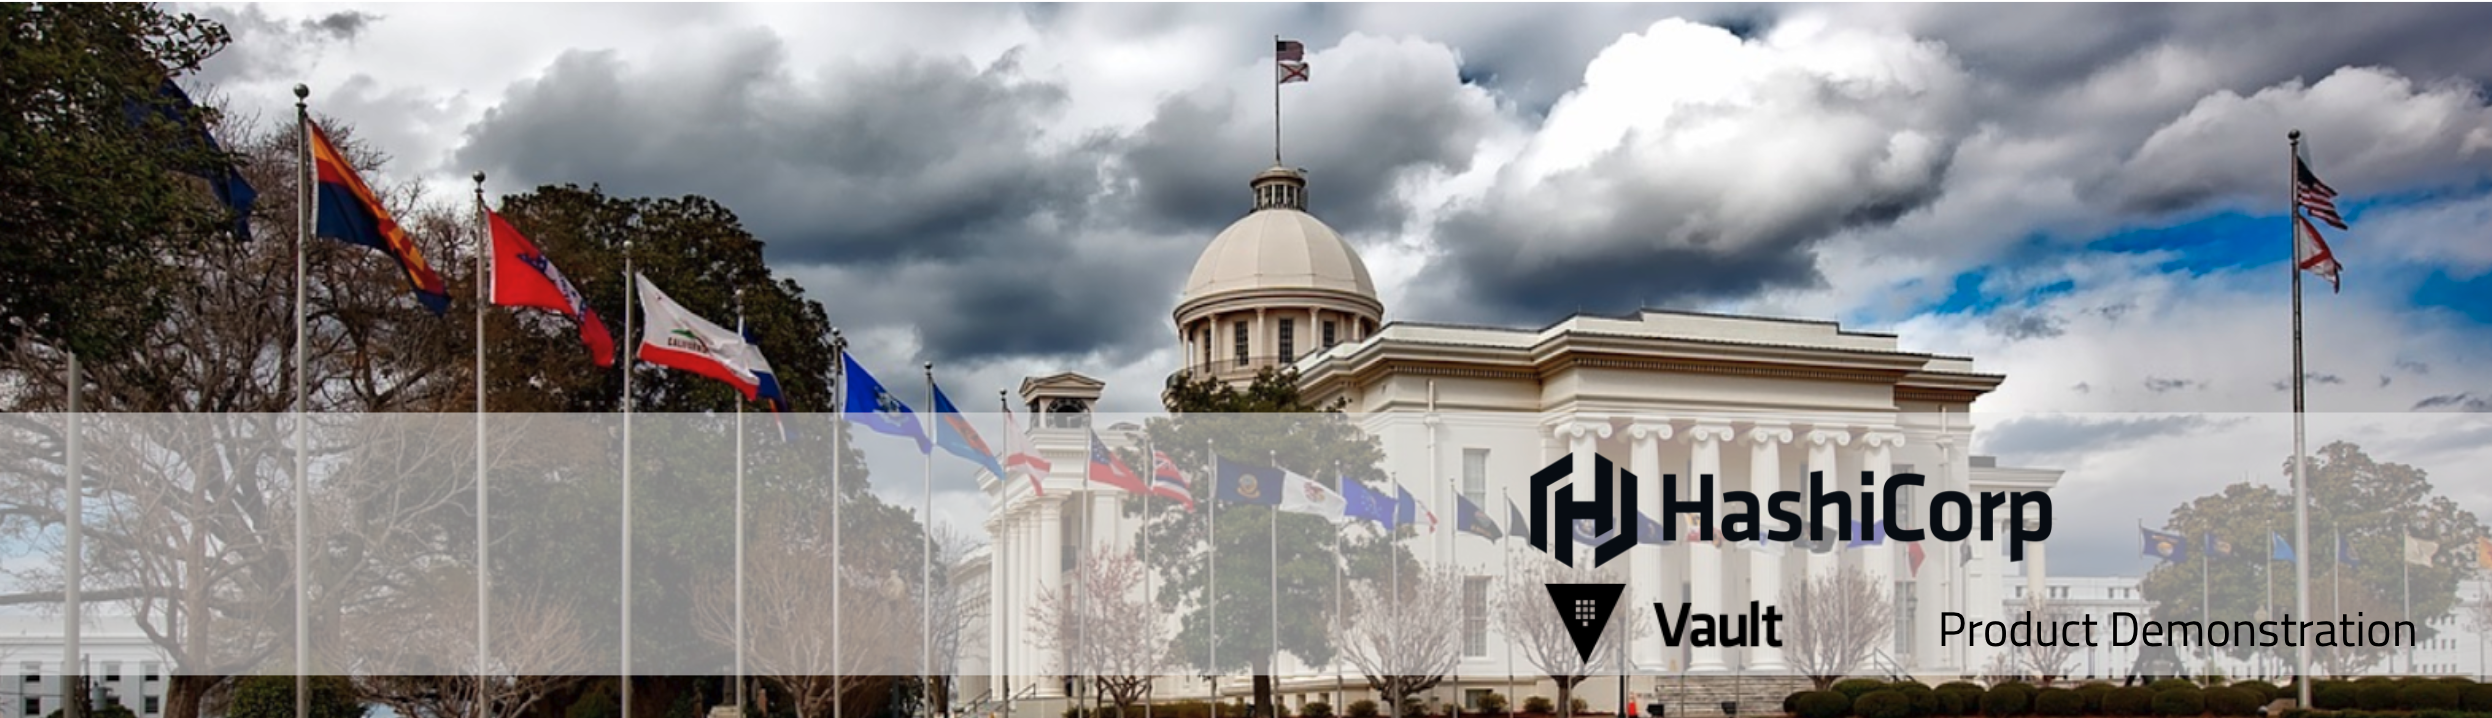

# Certificate Issuance
---

## Business Value of Capability
 * Use Vault as a Certificate Authority
 * Generate certs using apis for applications to enable TLS

### Prerequisites
* Running Vault Enterprise instance (even in dev mode)

<img src=attachment:image.png width=1000>
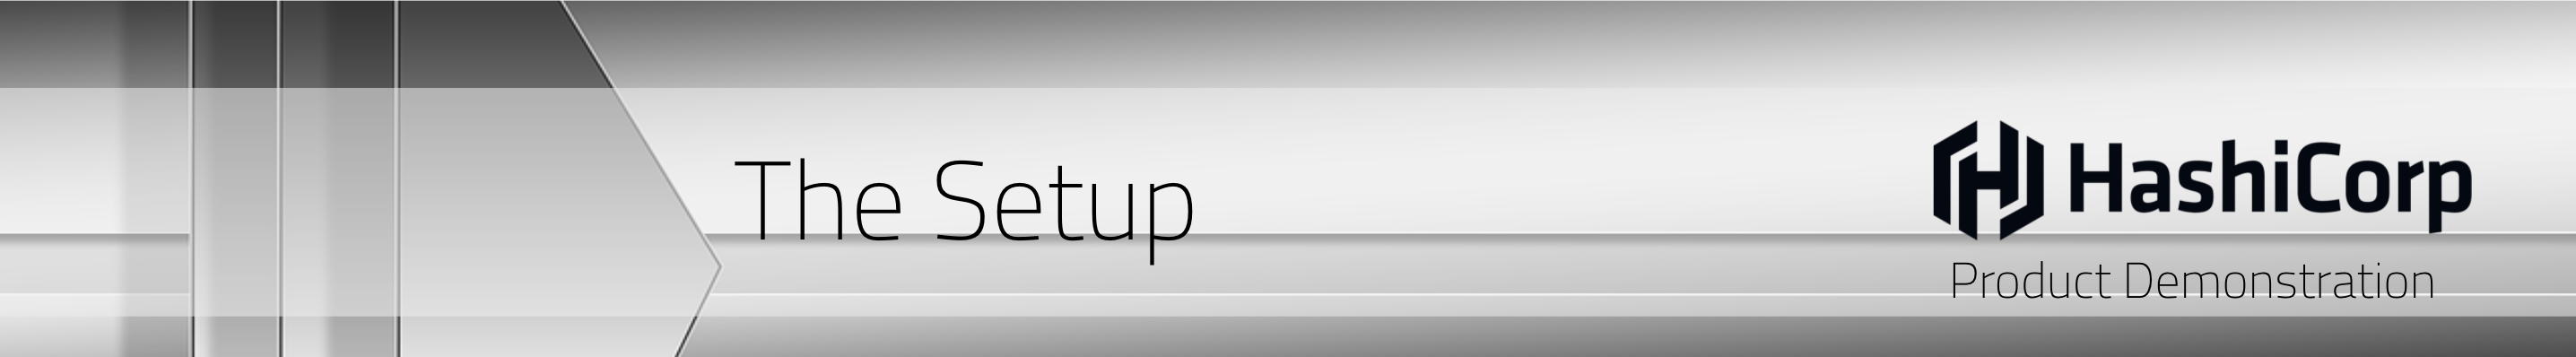

In [1]:
export VAULT_ADDR=http://127.0.0.1:8200
export VAULT_TOKEN=root
export VAULT_SKIP_VERIFY=true

In [2]:
vault login root

WARNING! The VAULT_TOKEN environment variable is set! This takes precedence
over the value set by this command. To use the value set by this command,
unset the VAULT_TOKEN environment variable or set it to the token displayed
below.

Success! You are now authenticated. The token information displayed below
is already stored in the token helper. You do NOT need to run "vault login"
again. Future Vault requests will automatically use this token.

Key                  Value
---                  -----
token                root
token_accessor       kQLYCm9cgnnc6XN9lHWQC15W
token_duration       ∞
token_renewable      false
token_policies       ["root"]
identity_policies    []
policies             ["root"]


In [3]:
vault status

Key             Value
---             -----
Seal Type       shamir
Initialized     true
Sealed          false
Total Shares    1
Threshold       1
Version         1.5.0+ent
Cluster Name    vault-cluster-49646d24
Cluster ID      9bd97d59-6256-17b6-6b9b-497db9c091f5
HA Enabled      true
HA Cluster      https://127.0.0.1:8201
HA Mode         active
Last WAL        34


In [4]:
vault -version

Vault v1.5.0+ent


<img src= attachment:image.png width=1000>

### Demo
---

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Enable the PKI Secrets Engine</span>

In [5]:
vault secrets enable pki

Success! Enabled the pki secrets engine at: pki/


**Tune the maximum length of a cert lease**

In [6]:
vault secrets tune -max-lease-ttl=8760h pki

Success! Tuned the secrets engine at: pki/


### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Configure A CA certificate and private key </span>

**Generate a certificate**

In [7]:
vault write pki/root/generate/internal \
    common_name=www.my-website.com \
    ttl=8760h

Key              Value
---              -----
certificate      -----BEGIN CERTIFICATE-----
MIIDTDCCAjSgAwIBAgIUVvQs0tAU0jDOZo79zdIC2X/qZ+cwDQYJKoZIhvcNAQEL
BQAwHTEbMBkGA1UEAxMSd3d3Lm15LXdlYnNpdGUuY29tMB4XDTIwMDgxNDE2MzQw
MVoXDTIxMDgxNDE2MzQzMVowHTEbMBkGA1UEAxMSd3d3Lm15LXdlYnNpdGUuY29t
MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA42iYIvYNGYlr3qsBZAG4
Xifz4jHJA7boE/1zMJCkKTqA01LrTvLIHRiG23Ol5BpGMVGhc5hP6AaVX/7dkSGi
uXX+VpH4JCZ+N5XBp9A/fWHn2OgZaVlNeFmQgeniVDMgUBR0sTGEi5SLcDmPjYaS
lwM/A/3P5rI81i7B9XM/TqYyFjCOmi09o7zYLZLmtxe69u6RR5z1Z4T93+FA9jpA
VfmD3o7h6J33tPMITqbXZNgdCBKRoXlxz1ehGZdtSVKAi00Dn127XoM/imFnHt+v
S6aCewiR3PeHjgX2nrfrV9XcIpSDBseQoxV5jKyf0PBLnvzpbB9tbeVmHRaaIT4E
PQIDAQABo4GDMIGAMA4GA1UdDwEB/wQEAwIBBjAPBgNVHRMBAf8EBTADAQH/MB0G
A1UdDgQWBBRKSkG9/GEIVd8bHYZ/3Nn2KnA5GjAfBgNVHSMEGDAWgBRKSkG9/GEI
Vd8bHYZ/3Nn2KnA5GjAdBgNVHREEFjAUghJ3d3cubXktd2Vic2l0ZS5jb20wDQYJ
KoZIhvcNAQELBQADggEBANki76anxqR50Y3MK9HsCp3yxfaqiar96jQHQCCd7Wco
87OzgwN+0pYPChwBNLM0w3zgBmnM1lZE0bcpHeKd70ZNkaR5lJ9Tyvj1D/73aoWc

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Update the Certificate Revocation List</span>

**Update CRL**

In [8]:
vault write pki/config/urls \
    issuing_certificates="http://127.0.0.1:8200/v1/pki/ca" \
    crl_distribution_points="http://127.0.0.1:8200/v1/pki/crl"

Success! Data written to: pki/config/urls


### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Configure Role for Issuing Certs</span>

**Configure role**

In [9]:
vault write pki/roles/example-dot-com \
    allowed_domains=my-website.com \
    allow_subdomains=true \
    max_ttl=72h

Success! Data written to: pki/roles/example-dot-com


### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Example Issue Request</span>

**Issue request**

In [10]:
vault write pki/issue/example-dot-com \
    common_name=www.my-website.com

Key                 Value
---                 -----
certificate         -----BEGIN CERTIFICATE-----
MIIDyzCCArOgAwIBAgIUEzjmYX+KLu9t5YOTCfxDIc2rTGkwDQYJKoZIhvcNAQEL
BQAwHTEbMBkGA1UEAxMSd3d3Lm15LXdlYnNpdGUuY29tMB4XDTIwMDgxNDE2MzQx
MloXDTIwMDgxNzE2MzQ0MlowHTEbMBkGA1UEAxMSd3d3Lm15LXdlYnNpdGUuY29t
MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA9bhhfmtnbTjmFTZ9dg4D
L0D0k2qgCS7bwZ1fLaoJWrIWxzdl57Px7I3R+bLwnz0lij8I141sN38vnL2csORi
/UY9wDnpOGmX+I6h26AuelHMC8WuAls0kuykxNdxEncOB68dMvwWJ0kZgPWY5Swr
IQ1W8GkocVXvn2AwqgtMm4J4mP2ewQPBNwbRUcMRapEWkoF6CObbt2nmDwEx2MLX
IXs99oSrZjy2XymdGyhrrA1DAMGAAL61dS2oVXUCDAcMKJ1rhc3QCc7EyZt5+ZUd
pflJiCuVr+2srfvyfhiGI/E33B29rZt7ev6LfwS5oK3+zW0tPVYkglbPaN0rvIXD
ZQIDAQABo4IBATCB/jAOBgNVHQ8BAf8EBAMCA6gwHQYDVR0lBBYwFAYIKwYBBQUH
AwEGCCsGAQUFBwMCMB0GA1UdDgQWBBQ5Xisg5//TiQtxWgduZ5E+giWe7DAfBgNV
HSMEGDAWgBRKSkG9/GEIVd8bHYZ/3Nn2KnA5GjA7BggrBgEFBQcBAQQvMC0wKwYI
KwYBBQUHMAKGH2h0dHA6Ly8xMjcuMC4wLjE6ODIwMC92MS9wa2kvY2EwHQYDVR0R
BBYwFIISd3d3Lm15LXdlYnNpdGUuY29tMDEGA1UdHwQqMCgwJqAkoCK

**END**

<img src=attachment:image.png width=1000>

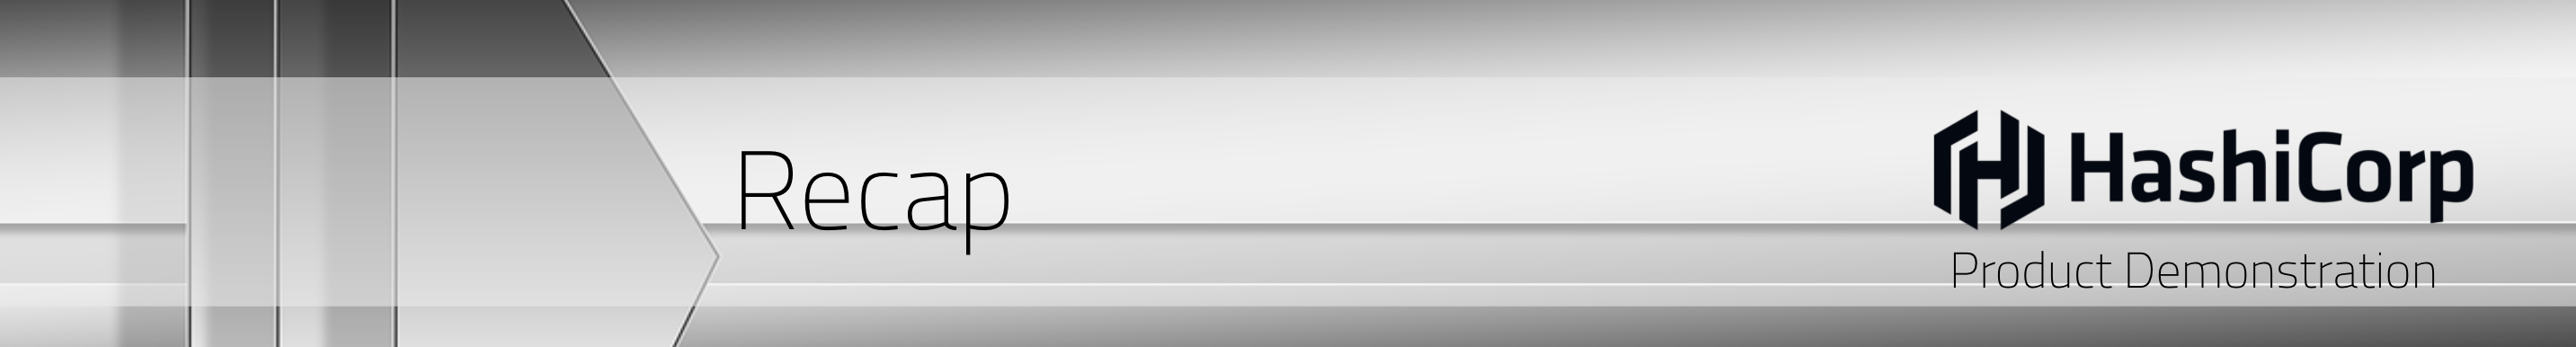

* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Configure A Cert Authority</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Tune Certificate times and update CRLs</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Give users an easy way to request certs</span>
